In [883]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [884]:
data = pd.read_csv('space_missions.csv', encoding= 'ISO-8859-1')

In [885]:
df = data.copy()

In [886]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [887]:
df.tail()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success
4629,CASC,"LC-3, Xichang Satellite Launch Center, China",2022-07-29,13:28:00,Long March 2D,Yaogan 35 Group 03,Active,29.75,Success


In [888]:
df.sample(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
977,RVSN USSR,"Site 132/1, Plesetsk Cosmodrome, Russia",1971-05-22,00:51:00,Cosmos-3M (11K65M),Cosmos 422,Retired,NaN,Success
1659,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1977-09-16,14:30:00,Soyuz U,Cosmos 953,Retired,NaN,Success
1647,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1977-08-24,07:07:00,Tsyklon-2,Cosmos 937,Retired,NaN,Success
4525,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2021-12-18,12:41:00,Falcon 9 Block 5,Starlink Group 4-4,Active,67,Success
599,RVSN USSR,"Site 90/19, Baikonur Cosmodrome, Kazakhstan",1967-10-27,02:21:00,Tsyklon-2A,Cosmos 185,Retired,NaN,Success


In [889]:
df.shape

(4630, 9)

In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [891]:
df.describe()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),DSP,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [892]:
df.describe().transpose()

,count,unique,top,freq
Company,4630,62,RVSN USSR,1777
Location,4630,158,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",251
Date,4630,4180,1962-04-26,4
Time,4503,1300,12:00:00,52
Rocket,4630,370,Cosmos-3M (11K65M),446
Mission,4630,4556,DSP,8
RocketStatus,4630,2,Retired,3620
Price,1265,65,450,136
MissionStatus,4630,4,Success,4162


In [893]:
df.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
dtype: int64

In [894]:
df.duplicated().sum()

1

In [895]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

In [896]:
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,DateTime
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957-10-04 19:28:00
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957-11-03 02:30:00
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957-12-06 16:44:00
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958-02-01 03:48:00
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958-02-05 07:33:00


In [897]:
df.isnull().sum()

Company             0
Location            0
Date                0
Time              127
Rocket              0
Mission             0
RocketStatus        0
Price            3365
MissionStatus       0
DateTime          127
dtype: int64

# Q1: Count the total number of missions for each company

In [899]:
launches = df['Company'].value_counts().reset_index()
launches

,Company,count
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216
...,...,...
57,OneSpace,1
58,Douglas,1
59,GK LS,1
60,Firefly,1


In [900]:
launches2 = launches[:10]
launches2

,Company,count
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216
5,NASA,203
6,SpaceX,182
7,US Air Force,161
8,ULA,151
9,Boeing,136


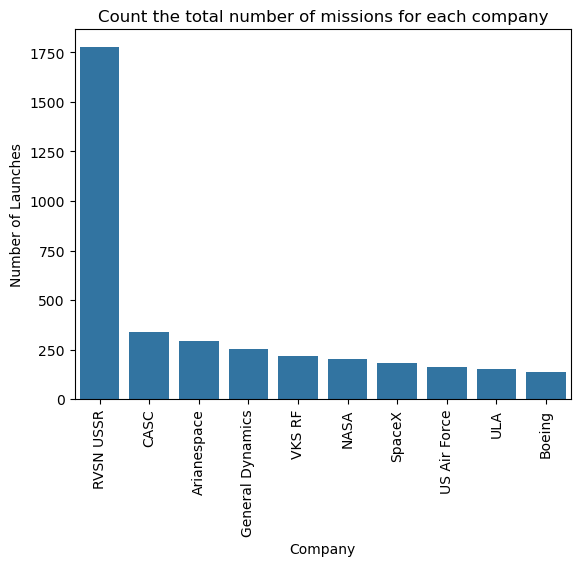

In [901]:
sns.barplot(x = 'Company', y = 'count', data= launches2)
plt.title('Count the total number of missions for each company')
plt.xlabel('Company')
plt.ylabel('Number of Launches')
plt.xticks(rotation = 90)
plt.show()

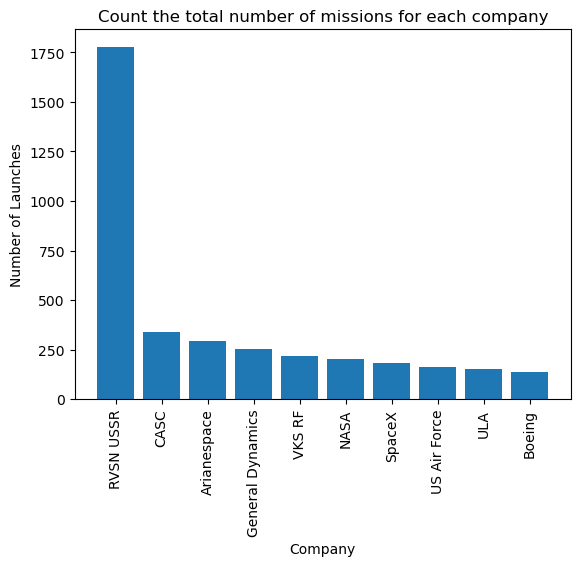

In [902]:
plt.bar(launches2['Company'], launches2['count'])
plt.title('Count the total number of missions for each company')
plt.xlabel('Company')
plt.ylabel('Number of Launches')
plt.xticks(rotation = 90)
plt.show()

# Q2: Count the number of successful missions for each company

In [904]:
succes = df[df['MissionStatus'] == 'Success']['Company'].value_counts().reset_index()
succes.head()

,Company,count
0,RVSN USSR,1614
1,CASC,318
2,Arianespace,282
3,General Dynamics,203
4,VKS RF,202


In [905]:
succes2 = succes[:15]

In [906]:
succes2

,Company,count
0,RVSN USSR,1614
1,CASC,318
2,Arianespace,282
3,General Dynamics,203
4,VKS RF,202
5,NASA,186
6,SpaceX,172
7,ULA,150
8,Boeing,131
9,US Air Force,129


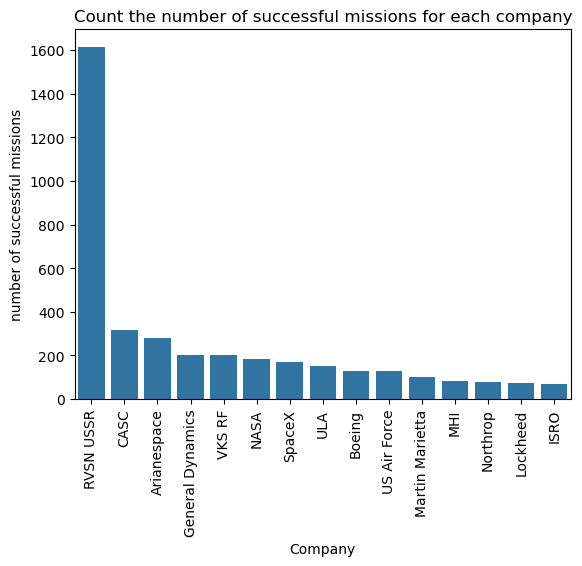

In [907]:
sns.barplot(x = 'Company', y = 'count', data= succes2)
plt.title('Count the number of successful missions for each company')
plt.xlabel('Company')
plt.ylabel('number of successful missions')
plt.xticks(rotation= 90)
plt.show()

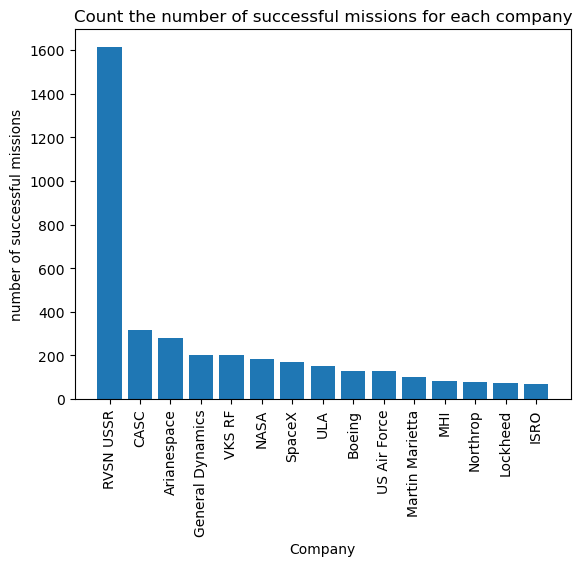

In [908]:
plt.bar(succes2['Company'], succes2['count'])
plt.title('Count the number of successful missions for each company')
plt.xlabel('Company')
plt.ylabel('number of successful missions')
plt.xticks(rotation= 90)
plt.show()

# Q3: Calculate the success rate per each company

In [910]:
launches.head()

,Company,count
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216


In [911]:
succes.head()

,Company,count
0,RVSN USSR,1614
1,CASC,318
2,Arianespace,282
3,General Dynamics,203
4,VKS RF,202


In [912]:
succes_rate = pd.merge(launches, succes, on= 'Company', how= 'left')

In [913]:
succes_rate.head()

,Company,count_x,count_y
0,RVSN USSR,1777,1614.0
1,CASC,338,318.0
2,Arianespace,293,282.0
3,General Dynamics,251,203.0
4,VKS RF,216,202.0


In [914]:
succes_rate = succes_rate.rename(columns= {'count_x': 'Total Mission', 'count_y': 'Succes Mission'})

In [915]:
succes_rate.head()

,Company,Total Mission,Succes Mission
0,RVSN USSR,1777,1614.0
1,CASC,338,318.0
2,Arianespace,293,282.0
3,General Dynamics,251,203.0
4,VKS RF,216,202.0


In [916]:
succes_rate['succes rate %'] = (succes_rate['Succes Mission'] / succes_rate['Total Mission']) * 100

In [917]:
succes_rate

,Company,Total Mission,Succes Mission,succes rate %
0,RVSN USSR,1777,1614.0,90.827237
1,CASC,338,318.0,94.082840
2,Arianespace,293,282.0,96.245734
3,General Dynamics,251,203.0,80.876494
4,VKS RF,216,202.0,93.518519
...,...,...,...,...
57,OneSpace,1,NaN,NaN
58,Douglas,1,1.0,100.000000
59,GK LS,1,1.0,100.000000
60,Firefly,1,NaN,NaN


In [918]:
succes_rate2 = succes_rate[:15]

In [919]:
succes_rate2

,Company,Total Mission,Succes Mission,succes rate %
0,RVSN USSR,1777,1614.0,90.827237
1,CASC,338,318.0,94.082840
2,Arianespace,293,282.0,96.245734
3,General Dynamics,251,203.0,80.876494
4,VKS RF,216,202.0,93.518519
5,NASA,203,186.0,91.625616
6,SpaceX,182,172.0,94.505495
7,US Air Force,161,129.0,80.124224
8,ULA,151,150.0,99.337748
9,Boeing,136,131.0,96.323529


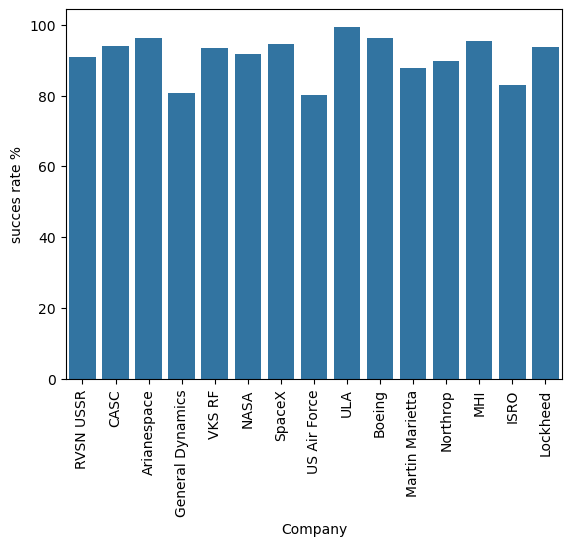

In [920]:
sns.barplot(x= 'Company', y= 'succes rate %', data= succes_rate2)
plt.xticks(rotation= 90)
plt.show()

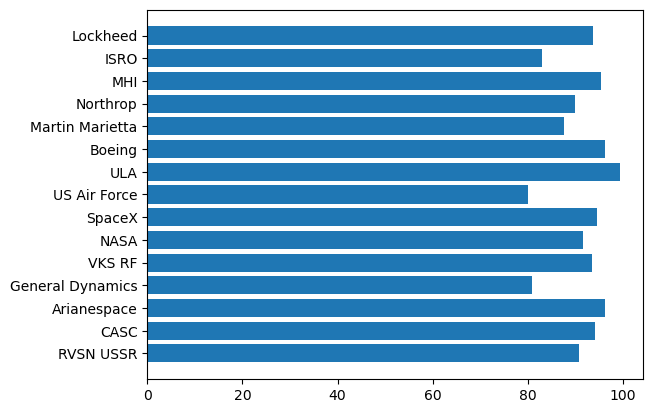

In [921]:
plt.barh(succes_rate2['Company'], succes_rate2['succes rate %'])
plt.show()

# Q4: What is the trend of mission success rates over time?

In [923]:
df['Date'] = pd.to_datetime(df['Date'])

In [924]:
df['Year'] = df['Date'].dt.year

In [925]:
total_M_per_year = df['Year'].value_counts().reset_index()
total_M_per_year.head()

,Year,count
0,2021,157
1,2020,119
2,1971,119
3,2018,117
4,1977,114


In [926]:
total_M_per_year.columns = ['Year', 'Total Missions']
total_M_per_year.head()

,Year,Total Missions
0,2021,157
1,2020,119
2,1971,119
3,2018,117
4,1977,114


In [927]:
success_M_per_year = df[df['MissionStatus'] == 'Success']['Year'].value_counts().reset_index()
success_M_per_year.head()

,Year,count
0,2021,143
1,2018,113
2,1977,110
3,1976,108
4,2020,107


In [928]:
success_M_per_year.columns = ['Year', 'Success Missions']
success_M_per_year.head()

,Year,Success Missions
0,2021,143
1,2018,113
2,1977,110
3,1976,108
4,2020,107


In [929]:
success_rate_per_year = pd.merge(total_M_per_year, success_M_per_year, on= 'Year', how= 'left')

In [930]:
success_rate_per_year.head()

,Year,Total Missions,Success Missions
0,2021,157,143
1,2020,119,107
2,1971,119,105
3,2018,117,113
4,1977,114,110


In [931]:
success_rate_per_year['Success rate %'] = (success_rate_per_year['Success Missions'] / success_rate_per_year['Total Missions']) * 100

In [932]:
success_rate_per_year.head()

,Year,Total Missions,Success Missions,Success rate %
0,2021,157,143,91.082803
1,2020,119,107,89.915966
2,1971,119,105,88.235294
3,2018,117,113,96.581197
4,1977,114,110,96.491228


In [933]:
success_rate_per_year = success_rate_per_year.sort_values(by= 'Year')
success_rate_per_year.head()

,Year,Total Missions,Success Missions,Success rate %
65,1957,3,2,66.666667
63,1958,28,6,21.428571
64,1959,20,8,40.000000
59,1960,39,19,48.717949
44,1961,52,32,61.538462


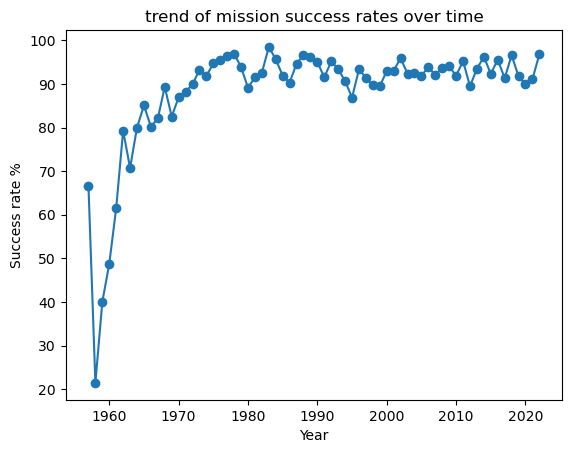

In [934]:
plt.plot(success_rate_per_year['Year'], success_rate_per_year['Success rate %'], marker= 'o')

plt.title('trend of mission success rates over time')
plt.xlabel('Year')
plt.ylabel('Success rate %')
plt.show()

# Q5: How has the number of space missions evolved over the years?

In [936]:
total_M_per_year.head()

,Year,Total Missions
0,2021,157
1,2020,119
2,1971,119
3,2018,117
4,1977,114


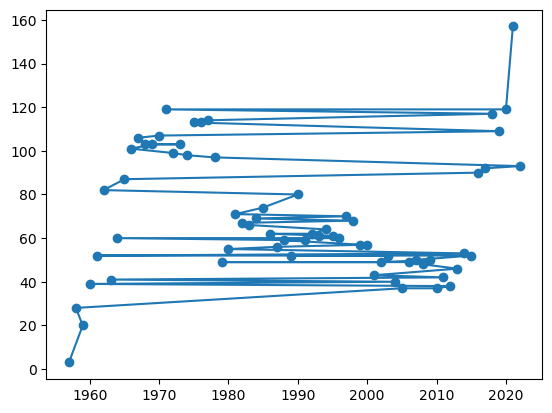

In [937]:
plt.plot(total_M_per_year['Year'], total_M_per_year['Total Missions'], marker= 'o')
plt.show()

<BarContainer object of 66 artists>

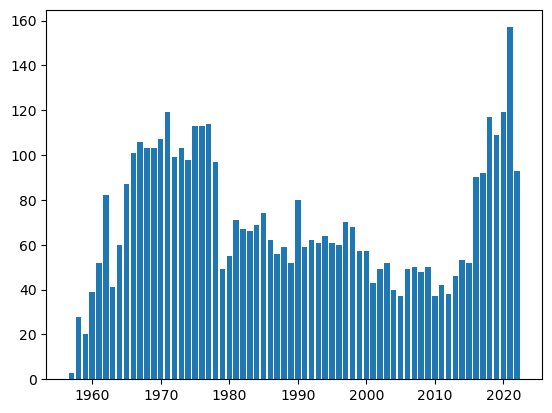

In [938]:
plt.bar(total_M_per_year['Year'], total_M_per_year['Total Missions'])

# Q6: Which year had the most space missions?

In [940]:
year_with_most_mission = total_M_per_year.loc[total_M_per_year['Total Missions'].idxmax()]

In [941]:
year_with_most_mission

Year              2021
Total Missions     157
Name: 0, dtype: int64

# Q7:Which countries have launched the most space missions?

In [943]:
mission_by_company = df['Company'].value_counts().reset_index()

mission_by_company.columns = ['Company', 'Number of Missions']

In [944]:
mission_by_company.head()

,Company,Number of Missions
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216


In [945]:
top_company = mission_by_company.loc[mission_by_company['Number of Missions'].idxmax()]

In [946]:
top_company

Company               RVSN USSR
Number of Missions         1777
Name: 0, dtype: object

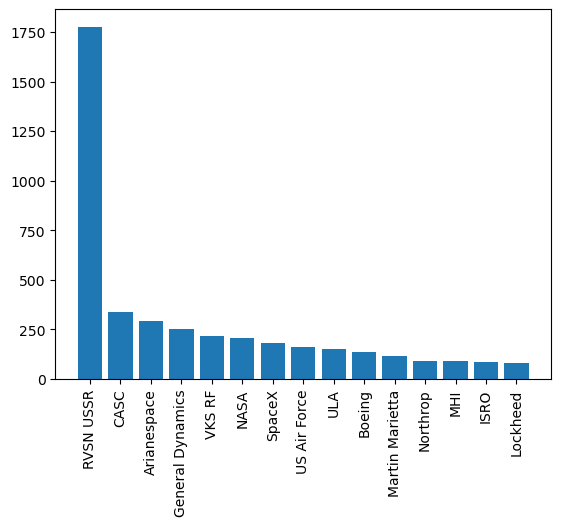

In [947]:
plt.bar(mission_by_company['Company'][:15], mission_by_company['Number of Missions'][:15])
plt.xticks(rotation= 90)
plt.show()

# Q8: What is the average cost of a space mission, and how does it vary by Company?

In [950]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4630 entries, 0 to 4629
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
1265 non-null   object
dtypes: object(1)
memory usage: 36.3+ KB


In [951]:
df['Price'] = pd.to_numeric(df['Price'], errors= 'coerce')

In [952]:
df['Price'].fillna(0, inplace= True)

/var/folders/7r/8kptsd6s1mg7_5bt9s6fsgw80000gn/T/ipykernel_7545/95449060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(0, inplace= True)


In [953]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4630 entries, 0 to 4629
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
4630 non-null   float64
dtypes: float64(1)
memory usage: 36.3 KB


In [954]:
apdatePrice = df[df['Price'] > 0]
apdatePrice.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,DateTime,Year
303,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-09-01,15:00:00,Titan IIIA,Transtage 1,Retired,63.23,Failure,1964-09-01 15:00:00,1964
323,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10,16:52:00,Titan IIIA,Transtage 2,Retired,63.23,Success,1964-12-10 16:52:00,1964
330,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11,15:19:00,Titan IIIA,LES 1,Retired,63.23,Success,1965-02-11 15:19:00,1965
352,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06,15:00:00,Titan IIIA,LES 2 & LCS 1,Retired,63.23,Success,1965-05-06 15:00:00,1965
468,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29,18:43:00,Titan IIIB,KH-8,Retired,59.00,Success,1966-07-29 18:43:00,1966


In [955]:
av_c_by_company = apdatePrice.groupby('Company')['Price'].mean().reset_index()

In [956]:
av_c_by_company.columns = ['Company', 'Average Cost']
av_c_by_company.head()

,Company,Average Cost
0,Arianespace,140.875969
1,Astra,2.500000
2,Boeing,177.285714
3,CASC,39.130669
4,CASIC,5.800000


In [957]:
company_highest_avg_cost = av_c_by_company.loc[av_c_by_company['Average Cost'].idxmax()]
company_highest_avg_cost

Company          NASA
Average Cost    450.0
Name: 19, dtype: object

In [958]:
company_lowest_avg_cost = av_c_by_company.loc[av_c_by_company['Average Cost'].idxmin()]
company_lowest_avg_cost

Company         Astra
Average Cost      2.5
Name: 1, dtype: object

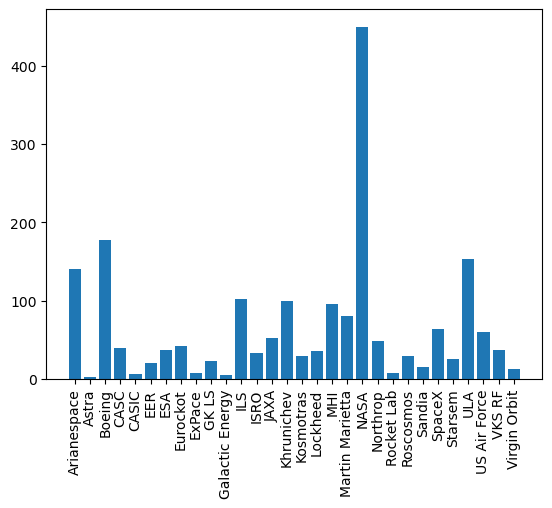

In [959]:
plt.figure(figure=(12, 20))
plt.bar(av_c_by_company['Company'], av_c_by_company['Average Cost'])
plt.xticks(rotation= 90)
plt.show()

# Q9: What is the success rate of missions by rocket type?

In [971]:
df['Rocket'] = df['Rocket'].str.strip() 

In [979]:
t_missions = df['Rocket'].value_counts().reset_index()
t_missions.columns = ['Rocket', 'Total Missions']
t_missions.head()

,Rocket,Total Missions
0,Cosmos-3M (11K65M),446
1,Voskhod,299
2,Molniya-M /Block ML,128
3,Cosmos-2I (63SM),126
4,Soyuz U,125


In [983]:
m_success = df[df['MissionStatus'] == 'Success']['Rocket'].value_counts().reset_index()
m_success.columns = ['Rocket', 'Success Mission']
m_success.head()

,Rocket,Success Mission
0,Cosmos-3M (11K65M),419
1,Voskhod,283
2,Molniya-M /Block ML,122
3,Cosmos-2I (63SM),118
4,Soyuz U,118


In [985]:
s_rate = pd.merge(t_missions, m_success, on= 'Rocket', how= 'left')
s_rate.head()

,Rocket,Total Missions,Success Mission
0,Cosmos-3M (11K65M),446,419.0
1,Voskhod,299,283.0
2,Molniya-M /Block ML,128,122.0
3,Cosmos-2I (63SM),126,118.0
4,Soyuz U,125,118.0


In [987]:
s_rate['Success Rate %'] = (s_rate['Success Mission'] / s_rate['Total Missions']) * 100

In [991]:
s_rate['Success Rate %'] =s_rate['Success Rate %'].fillna(0)

In [993]:
s_rate.head()

,Rocket,Total Missions,Success Mission,Success Rate %
0,Cosmos-3M (11K65M),446,419.0,93.946188
1,Voskhod,299,283.0,94.648829
2,Molniya-M /Block ML,128,122.0,95.312500
3,Cosmos-2I (63SM),126,118.0,93.650794
4,Soyuz U,125,118.0,94.400000


In [995]:
s_rate = s_rate.sort_values(by= 'Success Rate %', ascending= False)

In [1007]:
n_s_rate = s_rate[s_rate['Total Missions'] > 0]

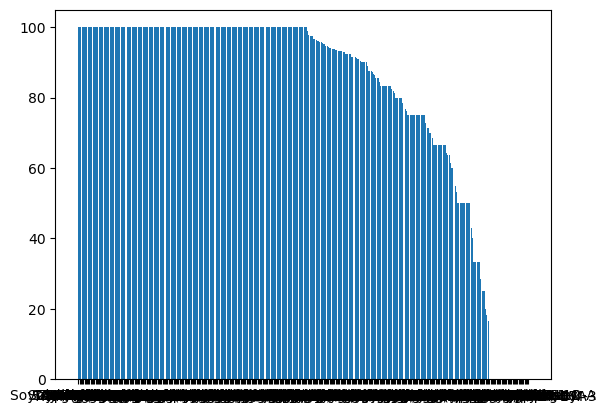

In [1009]:
plt.bar(n_s_rate['Rocket'], n_s_rate['Success Rate %'])
plt.show()